# **Exploratory Data Analysis**

**BY: Kajol Rafi, Emile Pascoe, Elliot Martin, Christian Durán**

_Big Data in Media Technology_

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Initial Data Exploration

In [3]:
# Reading wine data and loading it into a dataframe
df = pd.read_csv('wine_reviews.csv')

In [4]:
# Show top 5 records
df.head()

,Name,Variety,Origin,Attr_1,Attr_2,Alcohol_vol,Alcohol_percentage,Winemaker_notes,Review,Avg_rating,N_ratings,Price_Out-of-stock,Price
0,Chateau Du Caillau Cahors 2021,Malbec,"Cahors, Southwest, France",Red Wine,Green Wine,750.0,13.0,Deep intense ruby color. Ripe fruit on the nos...,COMMENTARY: The 2021 Chateau du Caillau is gen...,5.0,19.0,13.99,21.99
1,Coates and Seely Brut Reserve,Non-Vintage Sparkling Wine,England,Sparkling & Champagne,NaN,750.0,12.0,"A blend of Chardonnay and Pinot Noir, with res...",There's no rule that English sparkling wines m...,4.4,33.0,41.99,NaN
2,Emilio Moro Polvorete 2022,Godello,"Bierzo, Spain",White Wine,NaN,750.0,13.5,NaN,"A round and balanced white with green apples, ...",4.8,14.0,17.99,19.99
3,Bodegas La Purisma Old Vines Red Blend 2019,Other Red Blends,"Yecla, Spain",Red Wine,NaN,750.0,14.5,"La Purisima has a gorgeous black cherry color,...","An excellent blend with 85% monastrell, 10% sy...",4.4,56.0,10.99,NaN
4,La Chapelle du Bastion Picpoul de Pinet 2022,Picpoul,"Picpoul de Pinet, Languedoc, South of France, ...",White Wine,Screw Cap,750.0,12.5,Blend: 100% Picpoul Blanc,COMMENTARY: The 2022 Le Chapelle du Bastion Pi...,4.2,91.0,11.99,NaN


The main insight on the data with this visualization is that the origin value comes in different formats for each wine. Some wines have several values inside the origin columns, so data cleaning is needed in order to extract the data correctly. 

In [5]:
# Revising data types, amount of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208199 entries, 0 to 208198
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Name                207982 non-null  object 
 1   Variety             203519 non-null  object 
 2   Origin              203503 non-null  object 
 3   Attr_1              206376 non-null  object 
 4   Attr_2              42608 non-null   object 
 5   Alcohol_vol         207982 non-null  float64
 6   Alcohol_percentage  207982 non-null  float64
 7   Winemaker_notes     56088 non-null   object 
 8   Review              52645 non-null   object 
 9   Avg_rating          28015 non-null   float64
 10  N_ratings           28015 non-null   float64
 11  Price_Out-of-stock  207950 non-null  object 
 12  Price               49776 non-null   object 
dtypes: float64(4), object(9)
memory usage: 20.6+ MB


As it can be seen. Most of the wine pages does not have a winemaker note or a sommelier review. We can infer that this is due to the quality of the wine or they being a more commercial wine. For our prediction based on natural language we can consider only the records that do have the reviews present.

Further notice comes around when speaking about the Origin Column, nulls need to be droped in order to have it as a way to predict ratings.

Another observation is that the data types for Price_Out-of-stock and Price should be float 64, so more exploration on this columns needs to be done.

## Data Cleaning

### Origin

The main approach to clean this column is to split its data in different column. Starting by getting all the values into a list inside the same column and then create multiple columns for each origin value.

In [6]:
# Dropping Nulls
df2 = df.dropna(subset=['Origin'])

# Stripping end whitespace
df2['Origin'] = df2['Origin'].str.rstrip()

df2['Origin'].head()

0                            Cahors, Southwest, France
1                                              England
2                                        Bierzo, Spain
3                                         Yecla, Spain
4    Picpoul de Pinet, Languedoc, South of France, ...
Name: Origin, dtype: object

Data is split by commas, so splitting by that character should work.

In [7]:
# Spliting data based on commas for the origin column
df3 = df2.copy()

df3['Origin_List'] = df2['Origin'].str.split(',').apply(lambda x : x[::-1])

df3['Origin_List'].head(5)

0                        [ France,  Southwest, Cahors]
1                                            [England]
2                                     [ Spain, Bierzo]
3                                      [ Spain, Yecla]
4    [ France,  South of France,  Languedoc, Picpou...
Name: Origin_List, dtype: object

In [8]:
# Using the explode function from pandas in order to create different columns for each item in Origin_List
df4 = df3.copy()

# define a function to split the list into columns
def split_list(row):
    return pd.Series(row['Origin_List'])

# apply the function to the DataFrame
new_df4 = df4.apply(split_list, axis=1).rename(columns=lambda x: f"Origin_{x+1}")

# merge the new DataFrame with the original DataFrame
result_df4 = pd.concat([df4, new_df4], axis=1).drop(['Origin_List', 'Origin'], axis=1)

# Update the df3 dataframe
df4 = result_df4.copy()

df4.head()

,Name,Variety,Attr_1,Attr_2,Alcohol_vol,Alcohol_percentage,Winemaker_notes,Review,Avg_rating,N_ratings,Price_Out-of-stock,Price,Origin_1,Origin_2,Origin_3,Origin_4,Origin_5
0,Chateau Du Caillau Cahors 2021,Malbec,Red Wine,Green Wine,750.0,13.0,Deep intense ruby color. Ripe fruit on the nos...,COMMENTARY: The 2021 Chateau du Caillau is gen...,5.0,19.0,13.99,21.99,France,Southwest,Cahors,NaN,NaN
1,Coates and Seely Brut Reserve,Non-Vintage Sparkling Wine,Sparkling & Champagne,NaN,750.0,12.0,"A blend of Chardonnay and Pinot Noir, with res...",There's no rule that English sparkling wines m...,4.4,33.0,41.99,NaN,England,NaN,NaN,NaN,NaN
2,Emilio Moro Polvorete 2022,Godello,White Wine,NaN,750.0,13.5,NaN,"A round and balanced white with green apples, ...",4.8,14.0,17.99,19.99,Spain,Bierzo,NaN,NaN,NaN
3,Bodegas La Purisma Old Vines Red Blend 2019,Other Red Blends,Red Wine,NaN,750.0,14.5,"La Purisima has a gorgeous black cherry color,...","An excellent blend with 85% monastrell, 10% sy...",4.4,56.0,10.99,NaN,Spain,Yecla,NaN,NaN,NaN
4,La Chapelle du Bastion Picpoul de Pinet 2022,Picpoul,White Wine,Screw Cap,750.0,12.5,Blend: 100% Picpoul Blanc,COMMENTARY: The 2022 Le Chapelle du Bastion Pi...,4.2,91.0,11.99,NaN,France,South of France,Languedoc,Picpoul de Pinet,NaN


In [9]:
# Stripping whitespaces in the origin columns
df5 = df4.copy()

for col in df4.columns[-5:]:
    df5[col] = df4[col].str.lstrip().str.rstrip()

df5.iloc[0]['Origin_1']

'France'

## Numerical Columns

In [23]:
# Starting with changing the object columns to float64 datatype

df6 = df5.copy()
num_columns = ['Alcohol_vol', 'Alcohol_percentage', 'Avg_rating', 'N_ratings','Price_Out-of-stock', 'Price']

df6['Price_Out-of-stock'] = pd.to_numeric(df6['Price_Out-of-stock'], errors='coerce')
df6['Price'] = pd.to_numeric(df6['Price'], errors='coerce')

df6[num_columns].info()
df6[num_columns].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203503 entries, 0 to 208198
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Alcohol_vol         203503 non-null  float64
 1   Alcohol_percentage  203503 non-null  float64
 2   Avg_rating          27721 non-null   float64
 3   N_ratings           27721 non-null   float64
 4   Price_Out-of-stock  202786 non-null  float64
 5   Price               48600 non-null   float64
dtypes: float64(6)
memory usage: 10.9 MB


,Alcohol_vol,Alcohol_percentage,Avg_rating,N_ratings,Price_Out-of-stock,Price
count,203503.000000,203503.000000,27721.000000,27721.000000,202786.000000,48600.000000
mean,760.988197,5.441962,4.033660,27.392590,46.633633,55.364404
std,182.397938,6.758962,0.448285,58.019897,76.138547,84.155646
min,0.000000,0.000000,1.600000,5.000000,0.000000,7.990000
25%,750.000000,0.000000,3.800000,7.000000,15.990000,18.990000
50%,750.000000,0.000000,4.000000,12.000000,24.990000,28.990000
75%,750.000000,13.500000,4.300000,26.000000,46.990000,55.990000
max,9000.000000,149.000000,5.000000,1767.000000,999.990000,999.990000


We can see that there are over $70 \% $ missing values in the following columns: 

* Avg_rating: $86.38\%$
* N_ratings: $86.38\%$
* Price: $76.12\%$

We need to tackle this with either imputation, dropping these columns, or maybe add a missingness indicator column for each of these columns

In [22]:
# Checking missing values
for col in num_columns:
    missing_vals = df6[col].isnull().sum()
    percentage = np.round(missing_vals/df6.shape[0], decimals=4)*100
    print(f'Missing values for {col}: {missing_vals} ({percentage}%)')

Missing values for Alcohol_vol: 0 (0.0%)
Missing values for Alcohol_percentage: 0 (0.0%)
Missing values for Avg_rating: 175782 (86.38%)
Missing values for N_ratings: 175782 (86.38%)
Missing values for Price_Out-of-stock: 717 (0.35000000000000003%)
Missing values for Price: 154903 (76.12%)


<AxesSubplot: >

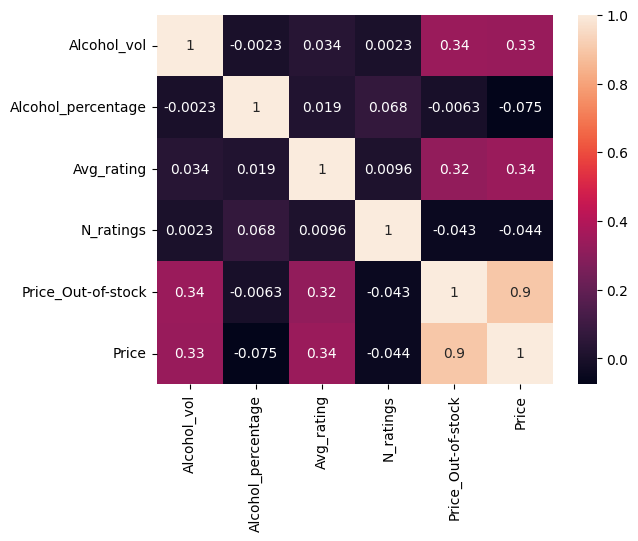

In [25]:
# Check correlation between numerical columns
sns.heatmap(df6[num_columns].corr(), annot=True)

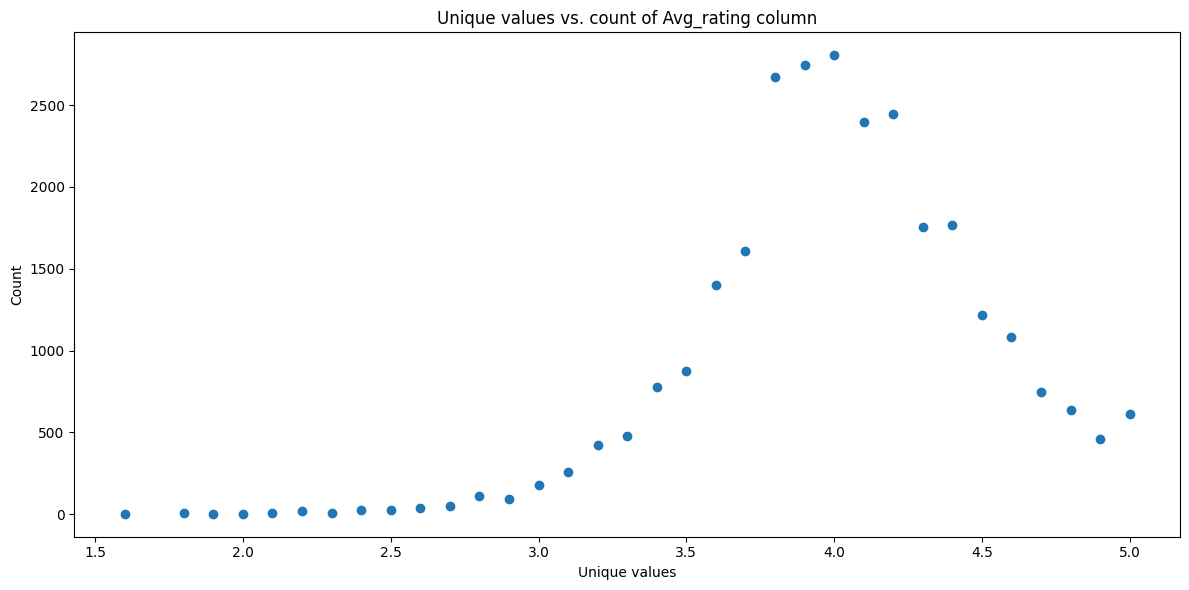

In [29]:
# If we're classifying based on the Avg_rating variable, it might be looking into the distribution of values
# Might need to 'bucket' values so we avoid it becoming a regression problem

vals = df6['Avg_rating'].value_counts()
vals_sorted =  vals.sort_index()

uniques = vals_sorted.index
count = vals_sorted.values

plt.figure(figsize=(12,6))
plt.scatter(uniques, count)
plt.xlabel("Unique values")
plt.ylabel("Count")
plt.title("Unique values vs. count of Avg_rating column")

plt.tight_layout()
plt.show()

## Categorical Columns